In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML_Projects/Online_Payment_Fraud_Detection/new_data.csv')

In [4]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


# Data Visualization

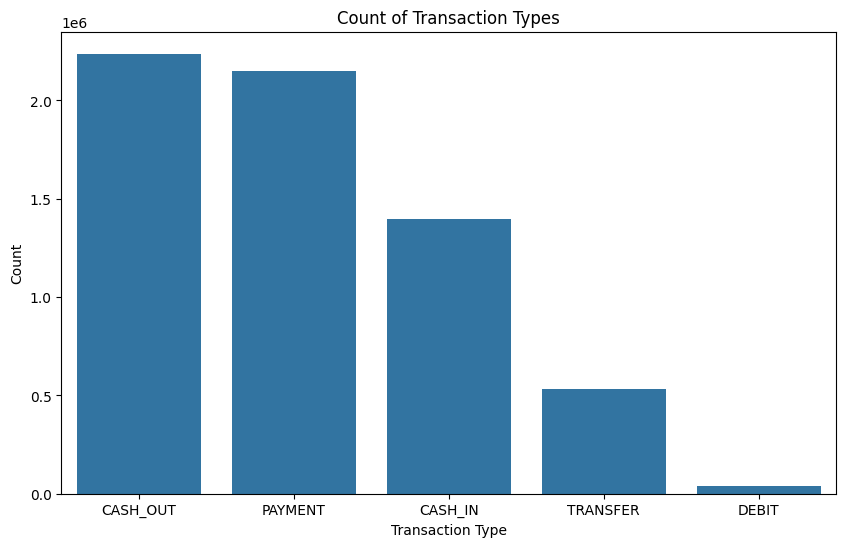

In [10]:
# prompt: create a visualization barchart for the type column with the counts of each type of transaction from the dataframe

type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [11]:
df['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


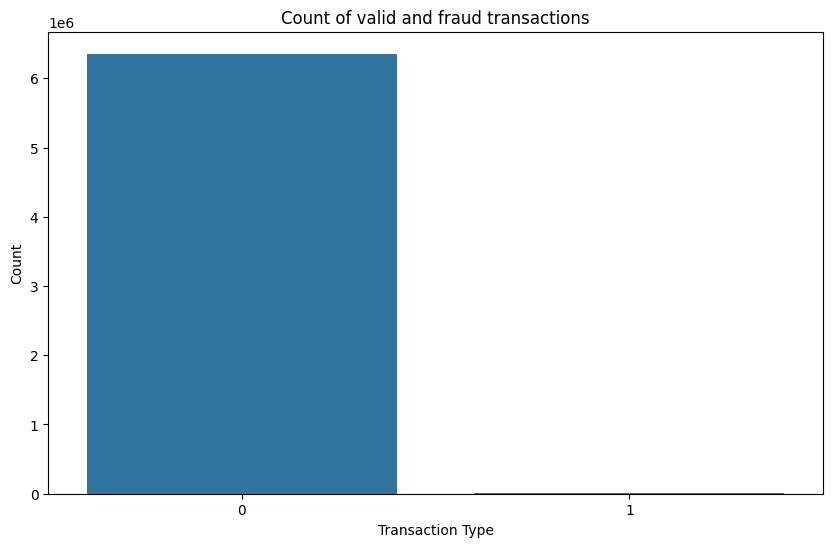

In [12]:
fraud_count = df['isFraud'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_count.index, y=fraud_count.values)
plt.title('Count of valid and fraud transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [13]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [14]:
df.shape

(6362620, 11)

In [15]:

print('No Frauds', round(df['isFraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['isFraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.87 % of the dataset
Frauds 0.13 % of the dataset


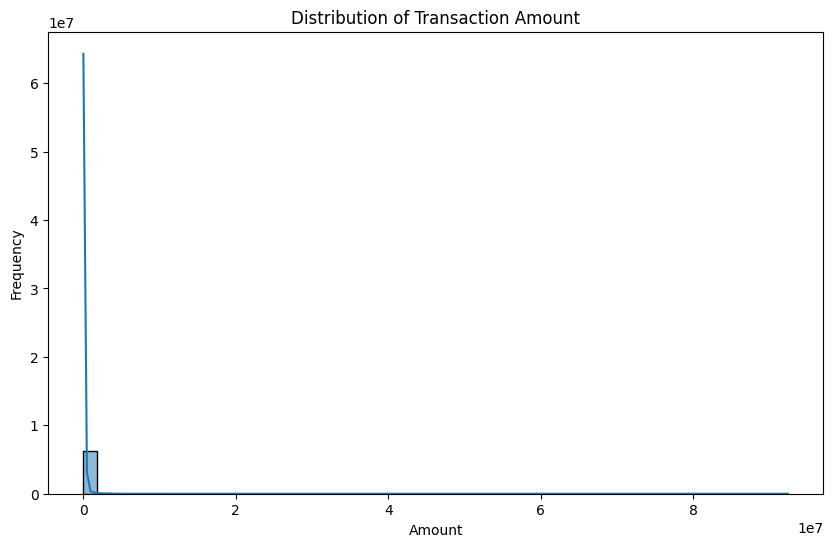

In [16]:


plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

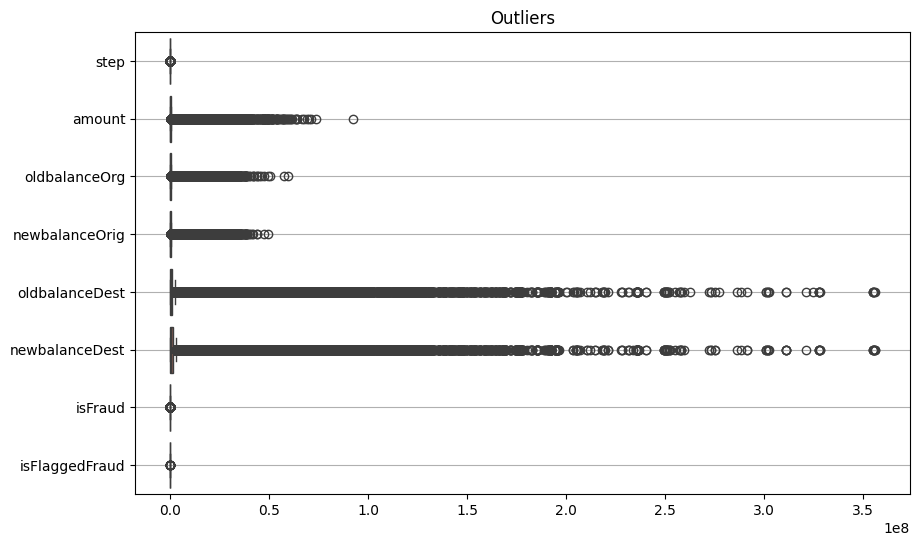

In [17]:
## Handling outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient = 'h')
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

In [18]:
# Label Encoding

df['type'] = df['type'].map({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})

In [19]:
df['type'].value_counts()

,count
type,
1,2237500
2,2151495
3,1399284
4,532909
5,41432


In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
# Dropping unnecessary columns

df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [22]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
df.shape

(6362620, 8)

In [24]:
# Feature extraction
# The correlation between features
# Understanding the correlation between various features in the dataset
# Selecting only the numeric columns

df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


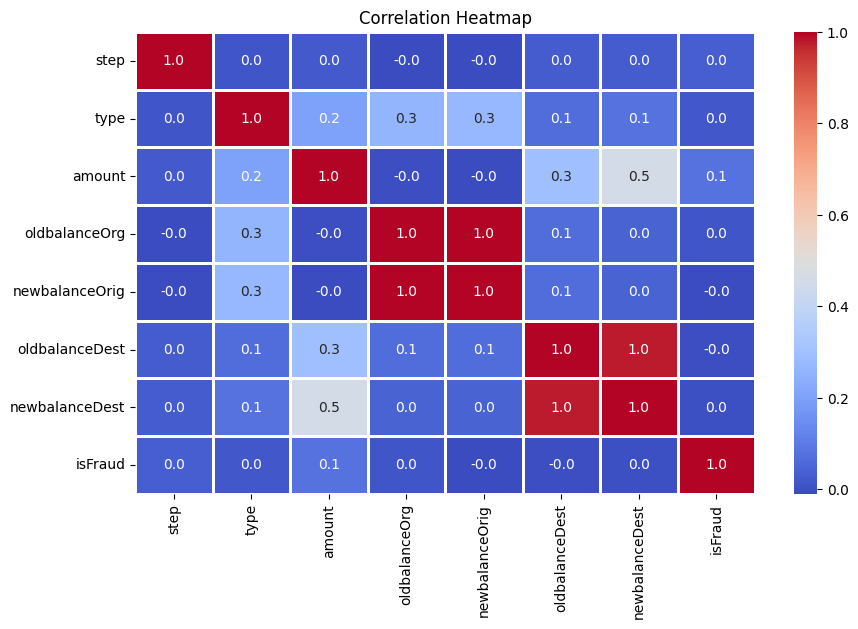

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.9, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

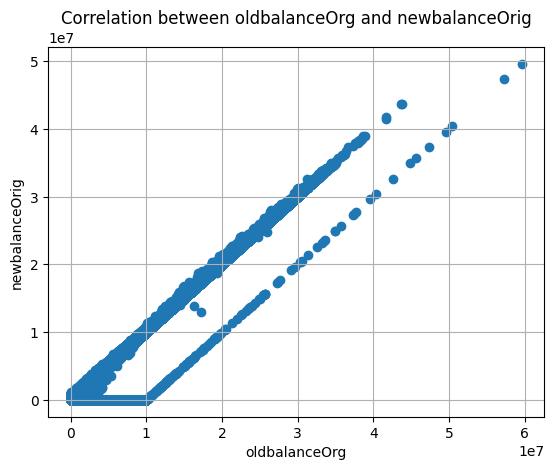

In [26]:
# Correlation between oldBalanceOrg and newbalanceOrig (0.99)
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('Correlation between oldbalanceOrg and newbalanceOrig')
plt.grid(True)
plt.show()

In [27]:
# Dropping Unnecessary features based on correlation
df1 = df.copy()
df.drop(['step', 'oldbalanceOrg'], axis=1, inplace=True)

In [28]:
df.columns

Index(['type', 'amount', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [29]:
df.shape

(6362620, 6)

In [30]:
df.tail()

,type,amount,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,1,339682.13,0.0,0.00,339682.13,1
6362616,4,6311409.28,0.0,0.00,0.00,1
6362617,1,6311409.28,0.0,68488.84,6379898.11,1
6362618,4,850002.52,0.0,0.00,0.00,1
6362619,1,850002.52,0.0,6510099.11,7360101.63,1


In [31]:
# Splitting the data and target

X = df.drop('isFraud', axis=1)
print("X shape is: ", X.shape)
print()

y = df['isFraud']
print("Y shape is: ", y.shape)


X shape is:  (6362620, 5)

Y shape is:  (6362620,)


In [32]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 5)
X_test shape is  (1908786, 5)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


In [33]:
# Data Scaling / Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [36]:
# Evaluation
Train_acc = model_LR.score(X_train, y_train)
Test_acc = model_LR.score(X_test, y_test)
print(f'Training accuracy: {Train_acc*100:.2f} %')
print(f'Testing accuracy: {Test_acc*100:.2f} %')

Training accuracy: 99.88 %
Testing accuracy: 99.88 %


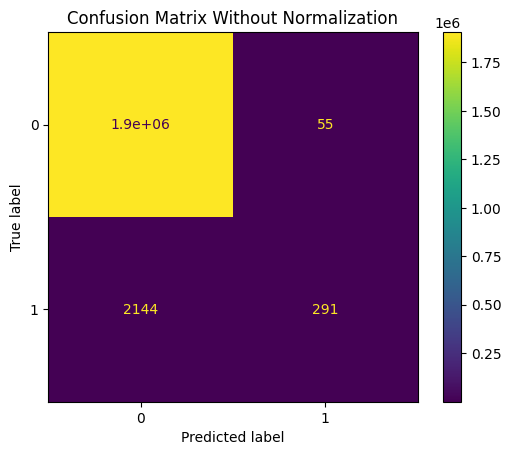

In [38]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

CM = confusion_matrix(y_test, y_pred_LR)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_LR.classes_).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [39]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.84      0.12      0.21      2435

    accuracy                           1.00   1908786
   macro avg       0.92      0.56      0.60   1908786
weighted avg       1.00      1.00      1.00   1908786



In [41]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.88 %

➤➤➤ Precision Score :  84.10 %

➤➤➤ Recall Score :  11.95 %

➤➤➤ F1 Score :  20.93 %

➤➤➤ AUC_ROC :  55.97 %



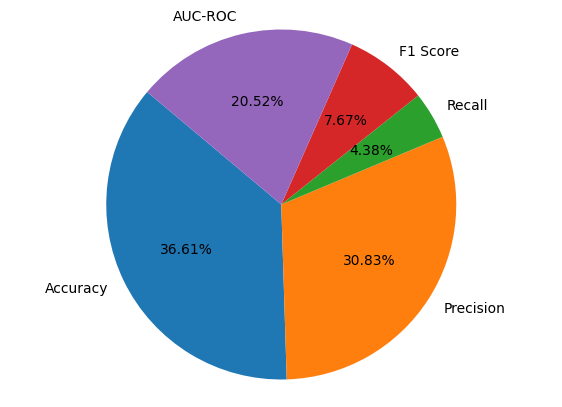

In [43]:
scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [45]:
# Applying Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [48]:
Train_acc_DT = model_DT.score(X_train, y_train)
Test_acc_DT = model_DT.score(X_test, y_test)
print(f'Training accuracy: {Train_acc_DT*100:.2f} %')
print(f'Testing accuracy: {Test_acc_DT*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.91 %


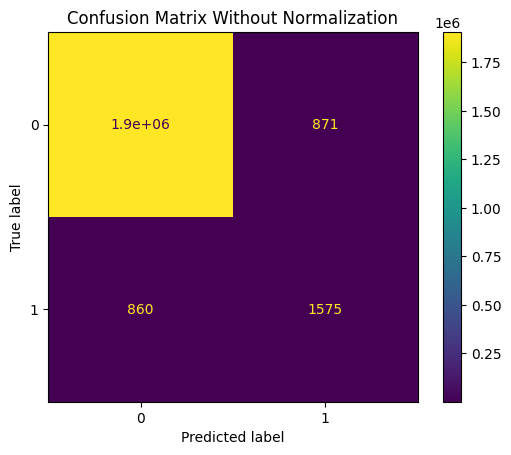

In [49]:
# Evaluation

CM = confusion_matrix(y_test, y_pred_DT)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_DT.classes_).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [50]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.64      0.65      0.65      2435

    accuracy                           1.00   1908786
   macro avg       0.82      0.82      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



In [51]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.91 %

➤➤➤ Precision Score :  64.39 %

➤➤➤ Recall Score :  64.68 %

➤➤➤ F1 Score :  64.54 %

➤➤➤ AUC_ROC :  82.32 %



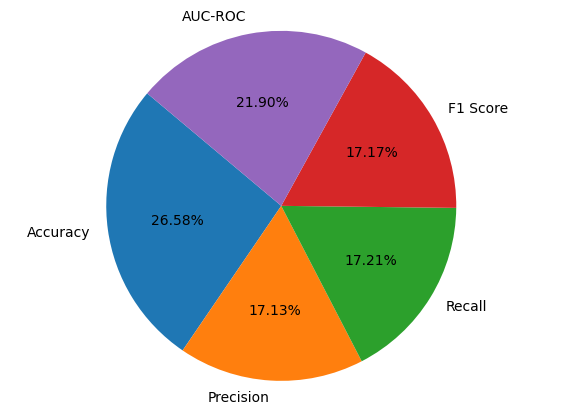

In [52]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT, ROC_AUC_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()


In [54]:
# Applying Niave Bayes Algorithm

from sklearn.naive_bayes import GaussianNB

Model_NB = GaussianNB()
Model_NB.fit(X_train, y_train)
y_pred_NB = Model_NB.predict(X_test)

In [55]:
# Quick evaluation
Train_Accuracy = Model_NB.score(X_train, y_train)
Test_Accuracy = Model_NB.score(X_test, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.15 %
Testing accuracy: 99.15 %


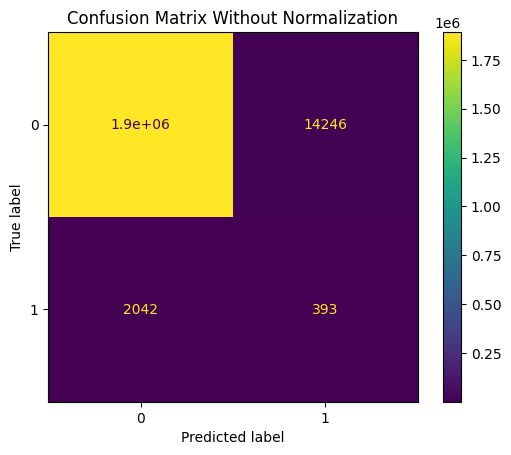

In [56]:
# Confusion Matrix

CM = confusion_matrix(y_test, y_pred_NB)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=Model_NB.classes_).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [57]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.03      0.16      0.05      2435

    accuracy                           0.99   1908786
   macro avg       0.51      0.58      0.52   1908786
weighted avg       1.00      0.99      0.99   1908786



In [58]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.15 %

➤➤➤ Precision Score :  2.68 %

➤➤➤ Recall Score :  16.14 %

➤➤➤ F1 Score :  4.60 %

➤➤➤ AUC_ROC :  57.70 %



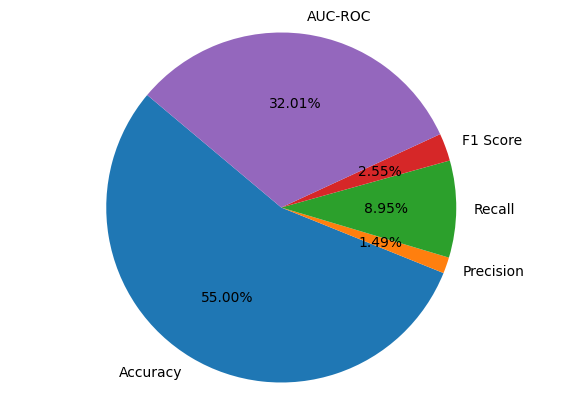

In [59]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB, ROC_AUC_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [60]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Naive Bayes'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100), (Accuracy_NB*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,99.884796
1,Decision Tree,99.909314
2,Naive Bayes,99.146683


# Trying without dropping correlated column

In [61]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,2,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,2,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


In [63]:
df1.drop(['step'], axis=1, inplace=True)

In [64]:
X = df1.drop('isFraud', axis=1)
print("X shape is: ", X.shape)
print()

y = df1['isFraud']
print("Y shape is: ", y.shape)

X shape is:  (6362620, 6)

Y shape is:  (6362620,)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 6)
X_test shape is  (1908786, 6)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


In [66]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_scaled, y_train)
y_pred_DT = model_DT.predict(X_test_scaled)

In [68]:
Train_acc_DT = model_DT.score(X_train_scaled, y_train)
Test_acc_DT = model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_acc_DT*100:.2f} %')
print(f'Testing accuracy: {Test_acc_DT*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.97 %


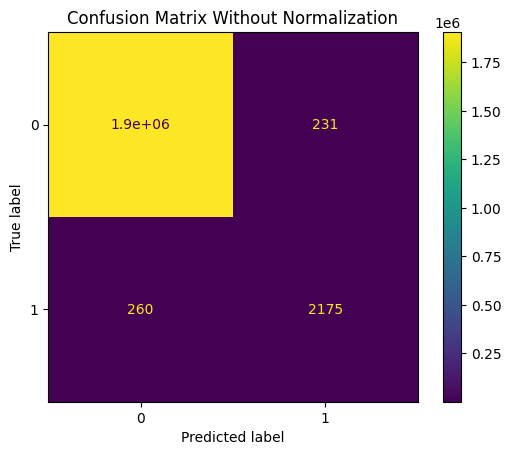

In [69]:
CM = confusion_matrix(y_test, y_pred_DT)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_DT.classes_).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [70]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.89      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.95      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



In [71]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.97 %

➤➤➤ Precision Score :  90.40 %

➤➤➤ Recall Score :  89.32 %

➤➤➤ F1 Score :  89.86 %

➤➤➤ AUC_ROC :  94.66 %



In [72]:
# Applying XGBoost algorithm

from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train_scaled, y_train)
y_pred_XGB = model_XGB.predict(X_test_scaled)

In [73]:
Train_acc_xgb = model_XGB.score(X_train_scaled, y_train)
Test_acc_xgb = model_XGB.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_acc_xgb*100:.2f} %')
print(f'Testing accuracy: {Test_acc_xgb*100:.2f} %')

Training accuracy: 99.97 %
Testing accuracy: 99.97 %


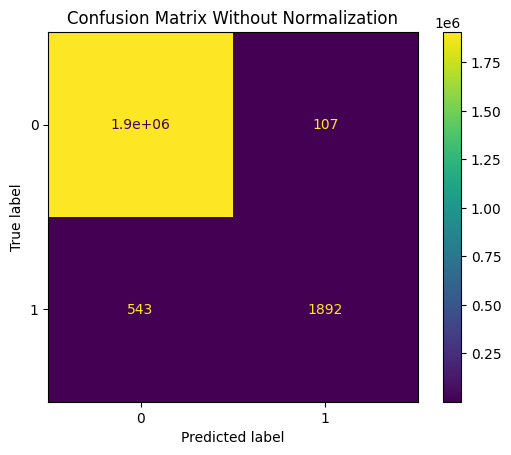

In [74]:
CM = confusion_matrix(y_test, y_pred_XGB)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model_XGB.classes_).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()